<a href="https://colab.research.google.com/github/amolaka/DS-3001---Voting-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd



In [3]:
# upload cleaned data
vdf = pd.read_csv('./voting_VA_clean.csv') # Load historical voting data
cdf = pd.read_csv('./county_adjacencies_clean.csv') # Load county adjacency data and population data

In [14]:
vdf.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,candidatevotes_log,totalvotes_log
0,0,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL,8.535426,9.386392
1,1,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,8.756525,9.386392
2,2,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL,5.393628,9.386392
3,3,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL,5.564520,9.386392
4,4,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL,9.696156,10.514502


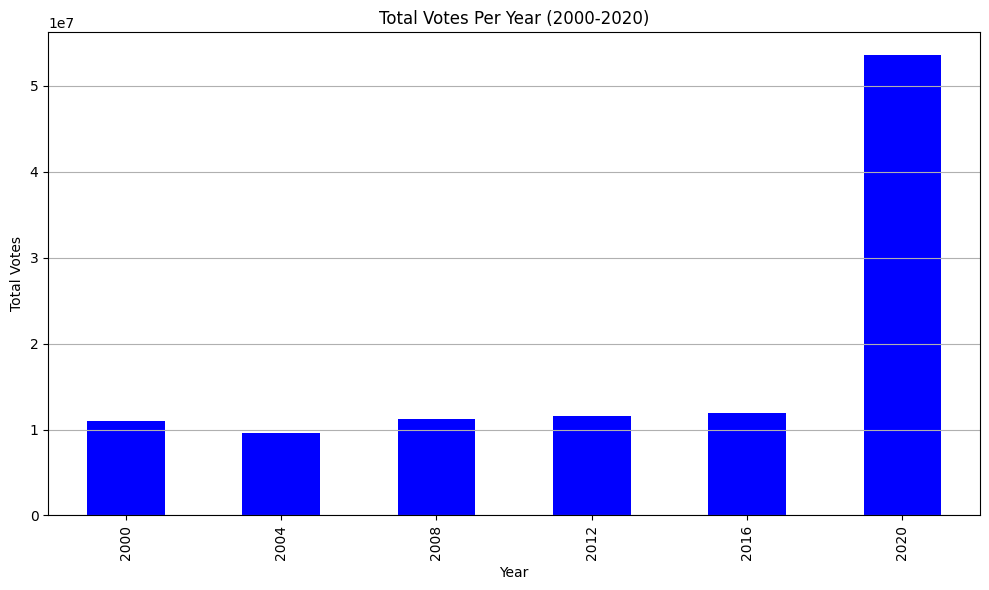

In [19]:
total_votes_per_year = vdf.groupby('year')['totalvotes'].sum()
# Plotting the results
plt.figure(figsize=(10, 6))
total_votes_per_year.plot(kind='bar', color='blue')

# Adding labels and title
plt.title('Total Votes Per Year (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Total Votes')

# Display the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

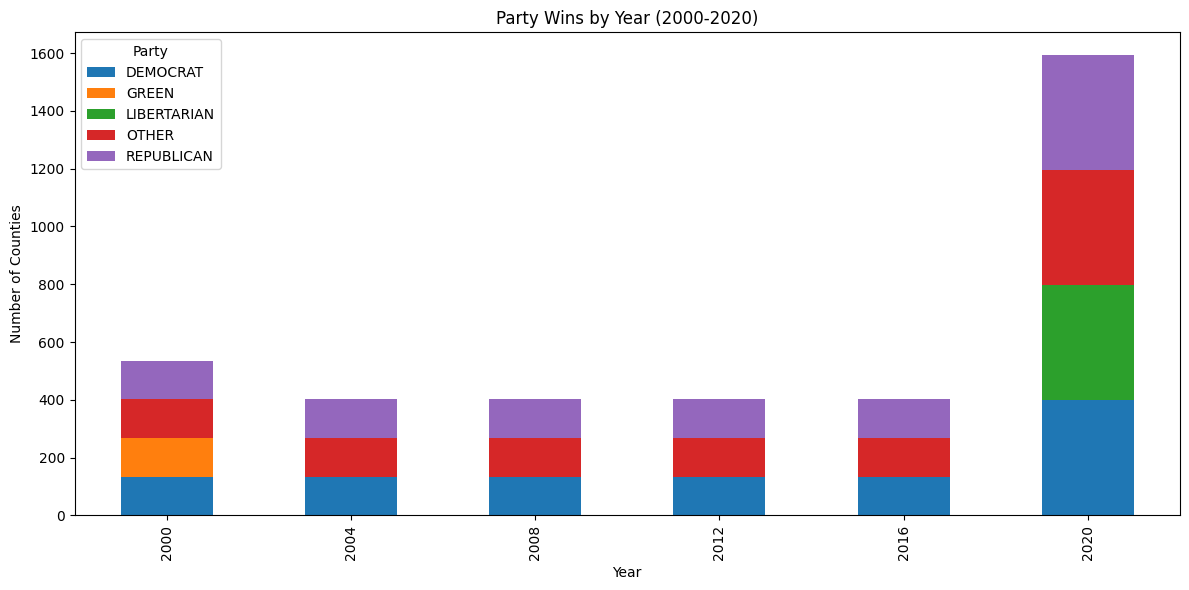

In [15]:

# Grouping the data by 'Year' and 'Party' and counting the number of occurrences
yearly_party_counts = vdf.groupby(['year', 'party']).size().reset_index(name='Count')

# Pivot the table to have parties as columns and years as rows
yearly_party_table = yearly_party_counts.pivot(index='year', columns='party', values='Count')

# Fill NaN values with 0 (if a party didn't win any counties in a particular year)
yearly_party_table = yearly_party_table.fillna(0)

# Plotting the results
yearly_party_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels and title
plt.title('Party Wins by Year (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Counties')
plt.legend(title='Party')

# Display the plot
plt.tight_layout()
plt.show()


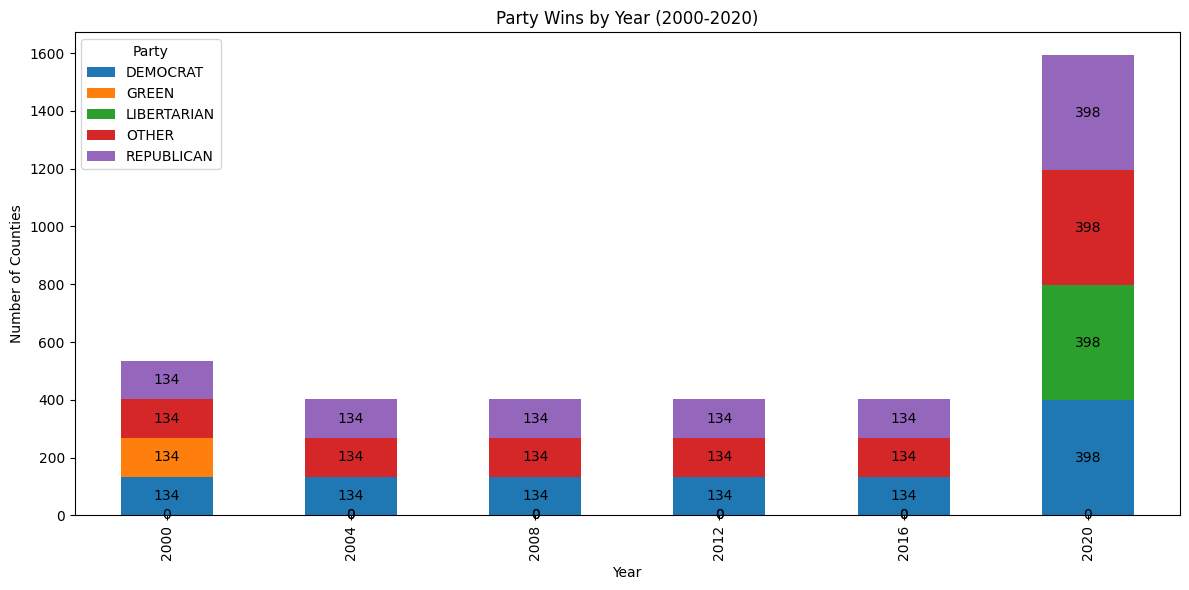

In [20]:
# Plotting the results
ax = yearly_party_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels and title
plt.title('Party Wins by Year (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Counties')
plt.legend(title='Party')

# Adding proportion values to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center')

# Display the plot
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd


# Group the data by county name and calculate the total votes for each county
county_total_votes = vdf.groupby('county_name')['totalvotes'].sum()

# Within each county group, find the winning candidate and calculate the percentage of total votes they received
def calculate_percentage(group):
    max_votes = group['candidatevotes'].max()
    total_votes = group['totalvotes'].iloc[0]  # Total votes for the county
    return (max_votes / total_votes) * 100

winning_candidate_percentage = vdf.groupby('county_name').apply(calculate_percentage)

# Construct a DataFrame with the county name and the percentage of votes for the winning candidate in each county
winning_candidate_percentage_df = pd.DataFrame(winning_candidate_percentage, columns=['Winning Candidate Percentage'])

# Display the resulting DataFrame
print(winning_candidate_percentage_df)


                 Winning Candidate Percentage
county_name                                  
ACCOMACK                            71.974843
ALBEMARLE                           90.690984
ALEXANDRIA                         103.701154
ALEXANDRIA CITY                     67.788805
ALLEGHANY                           95.139567
...                                       ...
WINCHESTER                          66.992138
WINCHESTER CITY                     42.045736
WISE                                90.803907
WYTHE                               98.249389
YORK                                82.186877

[167 rows x 1 columns]
